# Hwk 4 task 3 False Color 
- Author: Zoe Zhou
- [Link to github repo](https://github.com/ZoeZhouJ/eds220-hwk4.git)
- Course Website: [EDS 220](https://meds-eds-220.github.io/MEDS-eds-220-course/assignments/assignment4.html#false-color-image)

## About 

**Purpose**: This notebook demonstrates how to visualize Landsat multispectral data to analyze the 2017 Thomas Fire. As one of California's largest wildfires, it caused significant ecological and community impacts. False-color imagery, using infrared bands, highlights vegetation health, burn severity, and fire scars. This helps assess recovery, identify risks, and plan restoration.
We will create a false-color image of the Thomas Fire to explore how remote sensing and data visualization aid environmental monitoring.

**Highlights:**
- Preliminary data exploration with landsat data
- Create a true color image with RGB bands
- Create a false color image with infrared bands
- Visualize Thomas fire scar

**About the data**: The landsat data is a simplified collection of bands (red, green, blue, near-infrared and shortwave infrared) from the Landsat Collection 2 Level-2 atmosperically corrected surface reflectance data, collected by the Landsat 8 satellite. The data was retrieved from the Microsof Planetary Computer data catalogue and pre-processed to remove data outside land and coarsen the spatial resolution. This data should be used for visualization and educational purposes only.

Source: Landsat Collection 2 Level-2 [Microsoft Planetary Computer data catalogue](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2) 

## True Color Image
### Import Preprocesses Data
Explore the data and write a brief summary of the information. 

In [2]:
# Import packages
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import geopandas as gpd
import rioxarray as rioxr
import xarray as xr

In [3]:
# Import landset nc 
fp = os.path.join('/',
                 'courses',
                 'EDS220',
                 'data',
                 'hwk4_landsat_data',
                 'landsat8-2018-01-26-sb-simplified.nc')
fp
true_color = rioxr.open_rasterio(fp)
true_color.rio.crs

CRS.from_epsg(32611)

In [4]:
# Check dimension sizes
dict(true_color.sizes)
true_color.rio.bounds()
true_color.rio.crs

{'band': 1, 'x': 870, 'y': 731}

### Data Summary 
The xarray dataset contains Landsat 8 corrected surface reflectance data. There are three dimensions: 'band', 'x', and 'y'. The band dimension is singular (1), suggesting this dataset might represent a single time snapshot. The data contains five spectral bands, stored as individual variables: "red", "green", "blue", "nir08" and "swir22". 

### Drop the `band` dimension of the data 

In [5]:
# Check original dimensions and coordinates
print(true_color.dims, true_color.coords, '\n')

# Remove length 1 dimension (band)
true_color = true_color.squeeze()
print(true_color.dims, true_color.coords, '\n')

# Remove coordinates associated to band 
true_color = true_color.drop('band')
print(true_color.dims, true_color.coords)

FrozenMappingWarningOnValuesAccess({'band': 1, 'x': 870, 'y': 731}) Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0 

FrozenMappingWarningOnValuesAccess({'x': 870, 'y': 731}) Coordinates:
    band         int64 8B 1
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0 

FrozenMappingWarningOnValuesAccess({'x': 870, 'y': 731}) Coordinates:
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0


/tmp/ipykernel_2322641/1907449214.py:9: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  true_color = true_color.drop('band')


Without creating any new variables:

- select the red, green, and blue variables (in that order) of the `xarray.Dataset` holding the Landsat data,
- convert it to a numpy.array using the `to_array() `method, and then
- use `.plot.imshow()` to create an RGB image with the data. There will be a warning, that’s ok.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


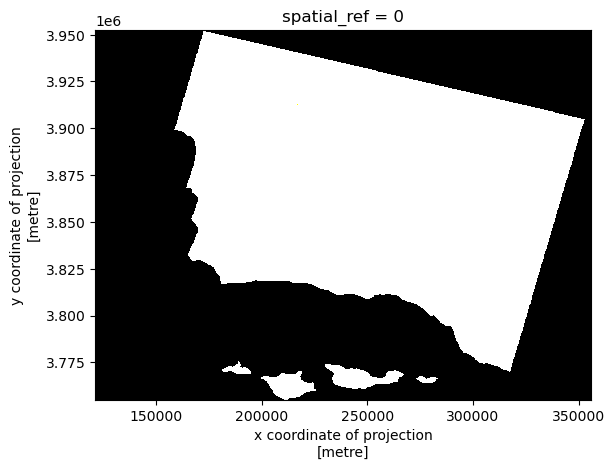

In [6]:
# Select variables 
(true_color[['red','green','blue']]
 .to_array('/data') # convert to numpy array
 .plot.imshow() # show plot
)

Adjust the scale used for plotting the bands to get a true color image. The issue here is the clouds: their RGB values are outliers and cause the other values to be squished when plotting.

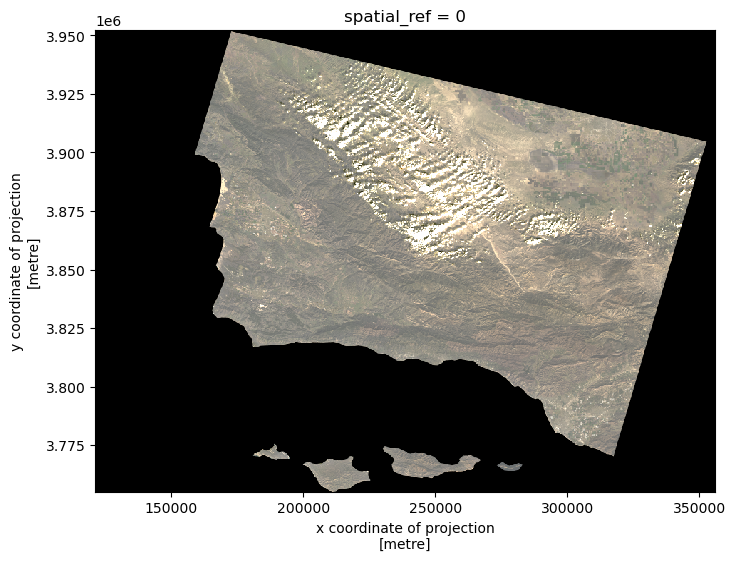

In [7]:
# adjust the scale used for plotting 
(true_color[['red','green','blue']]
 .to_array('/data')
 .plot.imshow(robust=True,
              size=6, 
              ))

### Write a brief explanation comparing the ouputs for parts (d) and (e)

When `robust=True` is passed to `imshow()`, it calculates the 2nd and 98th percentiles of the input array's pixel values. This get rid of the outliers and result in true color image of the RGB data. 

## False Color Image
Without creating any new variables, create a false color image by plotting the short-wave infrared (swir22), near-infrared, and red variables (in that order).

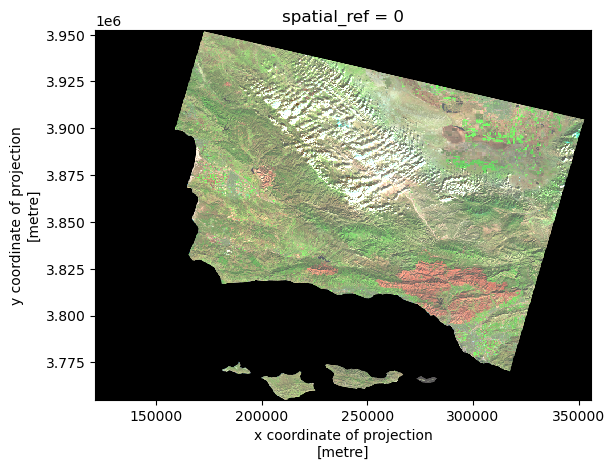

In [8]:
# Create false color image
(true_color[['swir22','nir08','red']] # Select swir22, nir, red variables
 .to_array()
 .plot.imshow(robust=True))

## Map
Create a map showing the shortwave infrared/near-infrared/red false color image together with the Thomas Fire perimeter. Customize it appropriately including, at least, an informative title and legend.

In [9]:
# Import Thomas Fire perimeter
thomas = gpd.read_file('data/thomas-fire-boundary-file')
# Get CRS for both layer
print(thomas.crs)
print(true_color.rio.crs)

# Match CRS for plotting 
thomas = thomas.to_crs("EPSG:32611")

# Verify matching CRS
assert true_color.rio.crs == thomas.crs


EPSG:3857
EPSG:32611


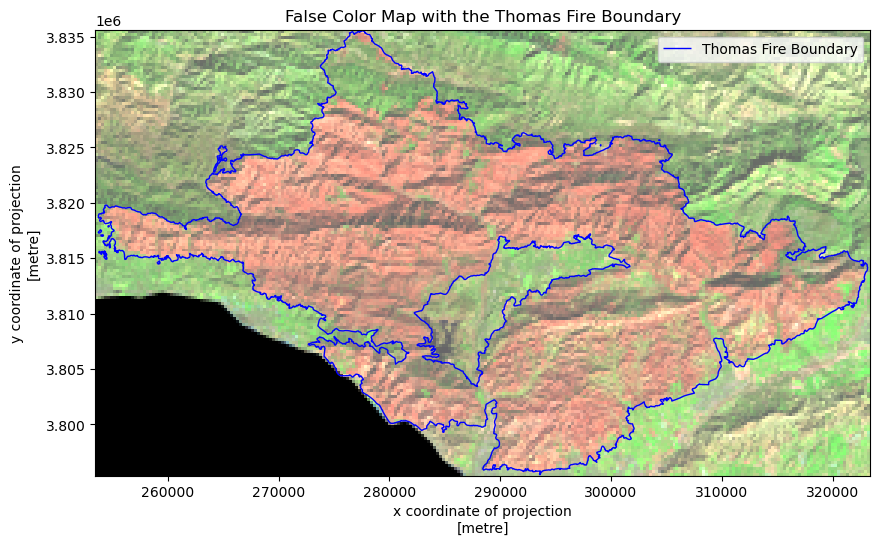

In [16]:
# Clipping true_color to fire boundary 
thomas_landsat = true_color.rio.clip_box(*thomas.total_bounds)
# Plot false color image and fire boundary
fig, ax = plt.subplots(figsize = (10, 10))

# Plot landsat map
(thomas_landsat[['swir22', 'nir08', 'red']]
 .to_array()
 .plot.imshow(ax=ax,
              robust=True))

# Overlay thomas fire boundary 
thomas.boundary.plot(ax=ax,
                    edgecolor="blue",
                    linewidth=1,
                    label='Thomas Fire Boundary')
# Clean up map
ax.legend()
ax.set_title('False Color Map with the Thomas Fire Boundary')
plt.show()

**False Color Map with the Thomas Fire Boundary**

This map displays the 2017 Thomas Fire region using false-color imagery derived from Landsat data. The pinkish/salmon colored area within the blue boundary line represents the burn scar from the Thomas Fire. The bright green areas surrounding the burn scar represent healthy, unburned vegetation. Using SWIR (shortwave infrared), NIR (near infrared), and red bands is particularly effective for burn scar analysis because:

- SWIR is sensitive to burn scars and can penetrate smoke
- NIR helps distinguish between burned and unburned vegetation
- Red light helps with overall land feature distinction
 
This visualization enhances the identification of burn scars, vegetation health, and moisture content. 